In [1]:
pip install plotly --upgrade

     |████████████████████████████████| 41.5MB 782kB/s 
  Found existing installation: plotly 3.6.1
    Uninstalling plotly-3.6.1:
      Successfully uninstalled plotly-3.6.1


In [2]:
import numpy as np
import pandas as pd
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='wel51x', api_key='jYoDj1DoqtzXVw27D9t9')
plotly.__version__

'3.10.0'

In [24]:
# Load S&P 500 df
df_quake_sp500 = pd.read_csv("https://raw.githubusercontent.com/labs13-quake-viewer/ds-data/master/" +
                             "S%26P%20500%20Price%20Change%20by%20Earthquake.csv")
df_quake_sp500['Mag'] = df_quake_sp500['Mag'].apply(lambda x: round(x, 1))
data = df_quake_sp500.groupby(['Mag'])['Appr_Day_30'].mean()
data

Mag
6.7    0.784892
6.8    0.854592
6.9    0.282868
7.0    0.892119
7.1    0.818553
7.2    0.124668
7.3    0.449155
7.4    0.024738
7.5    0.362847
7.6    0.761823
7.7   -0.062216
7.8    0.968380
7.9    0.419737
8.0    1.187691
8.1    1.230510
8.2    1.394880
8.3    0.495057
8.4    1.934919
8.5    1.286307
8.6    0.861004
8.7   -0.845036
8.8    5.154566
9.0    3.810300
9.1   -0.741434
9.2    0.265351
9.5    2.421096
Name: Appr_Day_30, dtype: float64

In [25]:
# Create df with date as index & mean of 30-day appreciation (grouped by date)
df_quake_sp500_means = pd.DataFrame(columns=['Mag'], index=[0])
df_quake_sp500_means = pd.concat([df_quake_sp500_means, data.to_frame()], ignore_index=True, sort=True)
df_quake_sp500_means = df_quake_sp500_means.iloc[1:]
df_quake_sp500_means.Mag = data.index
df_quake_sp500_means

,Appr_Day_30,Mag
1,0.784892,6.7
2,0.854592,6.8
3,0.282868,6.9
4,0.892119,7.0
5,0.818553,7.1
6,0.124668,7.2
7,0.449155,7.3
8,0.024738,7.4
9,0.362847,7.5
10,0.761823,7.6


In [0]:
# Extract Mag & 30-day appreciation for graphing
mag_sp500 = df_quake_sp500_means["Mag"].values
appr_sp500 = df_quake_sp500_means["Appr_Day_30"].values

In [7]:
# Load Gold df
df_quake_gold = pd.read_csv("https://raw.githubusercontent.com/labs13-quake-viewer/ds-data/master/" +
                            "Gold%20Price%20Change%20by%20Earthquake.csv", index_col=0)
data7 = df_quake_gold.groupby(['Mag'])['Appr_Day_7'].mean()
data14 = df_quake_gold.groupby(['Mag'])['Appr_Day_14'].mean()
data30 = df_quake_gold.groupby(['Mag'])['Appr_Day_30'].mean()
data30

Mag
6.7    0.524222
6.8    0.085566
6.9    0.231729
7.0   -0.271789
7.1    0.107205
7.2    1.754700
7.3    0.670126
7.4    1.329997
7.5    1.443031
7.6    1.021110
7.7    2.947221
7.8    0.425903
7.9    0.897363
8.0    1.658656
8.1    2.909621
8.2   -1.489643
8.3   -0.097974
8.4    2.311224
8.6   -1.255772
8.8   -0.583483
9.1    0.166164
Name: Appr_Day_30, dtype: float64

In [8]:
# Create df with date as index & mean of 7, 14 and 30-day appreciation (grouped by date)
df_quake_gold_means7 = pd.DataFrame(columns=['Mag'], index=[0])
df_quake_gold_means7 = pd.concat([df_quake_gold_means7, data7.to_frame()], ignore_index=True, sort=True)
df_quake_gold_means7 = df_quake_gold_means7.iloc[1:]
df_quake_gold_means7.Mag = data7.index

df_quake_gold_means14 = pd.DataFrame(columns=['Mag'], index=[0])
df_quake_gold_means14 = pd.concat([df_quake_gold_means14, data14.to_frame()], ignore_index=True, sort=True)
df_quake_gold_means14 = df_quake_gold_means14.iloc[1:]
df_quake_gold_means14.Mag = data14.index

df_quake_gold_means30 = pd.DataFrame(columns=['Mag'], index=[0])
df_quake_gold_means30 = pd.concat([df_quake_gold_means30, data30.to_frame()], ignore_index=True, sort=True)
df_quake_gold_means30 = df_quake_gold_means30.iloc[1:]
df_quake_gold_means30.Mag = data30.index
df_quake_gold_means30

,Appr_Day_30,Mag
1,0.524222,6.7
2,0.085566,6.8
3,0.231729,6.9
4,-0.271789,7.0
5,0.107205,7.1
6,1.754700,7.2
7,0.670126,7.3
8,1.329997,7.4
9,1.443031,7.5
10,1.021110,7.6


In [0]:
# Extract Mag & 7, 14 and 30-day appreciation for graphing
mag_gold7 = df_quake_gold_means7["Mag"].values
appr_gold7 = df_quake_gold_means7["Appr_Day_7"].values

mag_gold14 = df_quake_gold_means14["Mag"].values
appr_gold14 = df_quake_gold_means14["Appr_Day_14"].values

mag_gold30 = df_quake_gold_means30["Mag"].values
appr_gold30 = df_quake_gold_means30["Appr_Day_30"].values

In [10]:
# Graph Gold 7-day appreciation
colors =\
    {
    'background': '#111111',
    'text': '#FFDBFF'
    }

data = [go.Bar(
            x=mag_gold7,
            y=appr_gold7,
            orientation = 'v'
)]
layout = go.Layout(
    plot_bgcolor = colors['background'],
    paper_bgcolor = colors['background'],
    font = dict(
         color = colors['text']
    ),
    title='Gold Performance by Incident Magnitude',
    #plot_bgcolor='rgba(245, 245, 245, 1)',
    xaxis=dict(
        title='Magnitude',
        titlefont=dict(
            size=16,
            #color='rgb(107, 107, 107)'
            color=colors['text']
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Percentage Gain/Loss',
        titlefont=dict(
            size=16,
            #color='rgb(107, 107, 107)'
            color=colors['text']
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Gold-7')

In [12]:
# Graph Gold 14-day appreciation
colors =\
    {
    'background': '#111111',
    'text': '#FFDBFF'
    }

data = [go.Bar(
            x=mag_gold14,
            y=appr_gold14,
            orientation = 'v'
)]
layout = go.Layout(
    plot_bgcolor = colors['background'],
    paper_bgcolor = colors['background'],
    font = dict(
         color = colors['text']
    ),
    title='Gold Performance by Incident Magnitude',
    #plot_bgcolor='rgba(245, 245, 245, 1)',
    xaxis=dict(
        title='Magnitude',
        titlefont=dict(
            size=16,
            #color='rgb(107, 107, 107)'
            color=colors['text']
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Percentage Gain/Loss',
        titlefont=dict(
            size=16,
            #color='rgb(107, 107, 107)'
            color=colors['text']
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Gold-14')

In [13]:
# Graph Gold 1-month appreciation
colors =\
    {
    'background': '#111111',
    'text': '#FFDBFF'
    }

data = [go.Bar(
            x=mag_gold30,
            y=appr_gold30,
            orientation = 'v'
)]
layout = go.Layout(
    plot_bgcolor = colors['background'],
    paper_bgcolor = colors['background'],
    font = dict(
         color = colors['text']
    ),
    title='Gold Performance by Incident Magnitude',
    #plot_bgcolor='rgba(245, 245, 245, 1)',
    xaxis=dict(
        title='Magnitude',
        titlefont=dict(
            size=16,
            #color='rgb(107, 107, 107)'
            color=colors['text']
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Percentage Gain/Loss',
        titlefont=dict(
            size=16,
            #color='rgb(107, 107, 107)'
            color=colors['text']
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Gold-30')

In [15]:
# Graph S&P 500 1-month appreciation
colors =\
    {
    'background': '#111111',
    'text': '#FFDBFF'
    }

data = [go.Bar(
            x=mag_sp500,
            y=appr_sp500,
            orientation = 'v'
)]
layout = go.Layout(
    plot_bgcolor = colors['background'],
    paper_bgcolor = colors['background'],
    font = dict(
         color = colors['text']
    ),
    title='S&P 500 Performance by Incident Magnitude',
    #plot_bgcolor='rgba(245, 245, 245, 1)',
    xaxis=dict(
        title='Magnitude',
        titlefont=dict(
            size=16,
            #color='rgb(107, 107, 107)'
            color=colors['text']
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Percentage Gain/Loss',
        titlefont=dict(
            size=16,
            #color='rgb(107, 107, 107)'
            color=colors['text']
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='sp500-30')


In [21]:
# Chart US incidents by S&P 500 performance
import matplotlib.pyplot as plt
df_quake_sp500_usa = pd.read_csv("https://raw.githubusercontent.com/labs13-quake-viewer/ds-data/master/" +
                                 "S%26P%20500%20Price%20Change%20by%20Earthquake%20(USA).csv")
# now plot the mean of the 30day grouped by earthquake magnitude
df = df_quake_sp500_usa.groupby(['Mag'])['Appr_Day_30'].mean()
df

Mag
6.70     0.081836
6.73    -0.236140
6.80    -1.789781
6.90     0.948241
6.92    -1.001998
7.10    11.183849
7.26    -1.001998
7.30    -0.835969
7.50     0.000000
Name: Appr_Day_30, dtype: float64

In [26]:
# Create df with date as index & mean of 30-day appreciation (grouped by date)
df_quake_sp500_usa = pd.DataFrame(columns=['Mag'], index=[0])
df_quake_sp500_usa = pd.concat([df_quake_sp500_usa, df.to_frame()], ignore_index=True, sort=True)
df_quake_sp500_usa = df_quake_sp500_usa.iloc[1:]
df_quake_sp500_usa.Mag = df.index
df_quake_sp500_usa

,Appr_Day_30,Mag
1,0.081836,6.70
2,-0.236140,6.73
3,-1.789781,6.80
4,0.948241,6.90
5,-1.001998,6.92
6,11.183849,7.10
7,-1.001998,7.26
8,-0.835969,7.30
9,0.000000,7.50


In [0]:
# Extract Mag & 30-day appreciation for graphing
mag_sp500_usa = df_quake_sp500_usa["Mag"].values
appr_sp500_usa = df_quake_sp500_usa["Appr_Day_30"].values

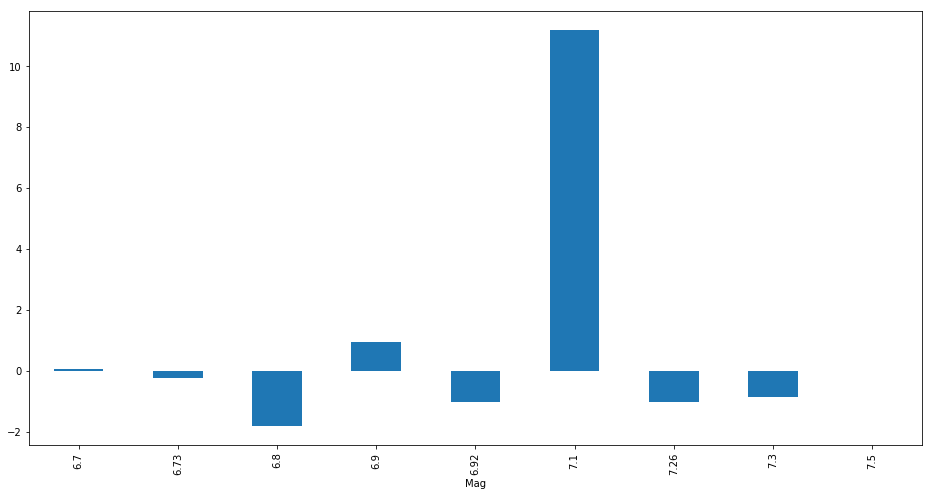

In [28]:
# Matplotlib chart for ref.
df.plot.bar(figsize=(16, 8))
plt.show()

In [31]:
# Graph US S&P 500 1-month appreciation
colors =\
    {
    'background': '#111111',
    'text': '#FFDBFF'
    }

data = [go.Bar(
            x=mag_sp500_usa,
            y=appr_sp500_usa,
            width = [0.0325, 0.0325, 0.0325, 0.0325, 0.0325,
                    0.0325, 0.0325, 0.0325, 0.0325],
            orientation = 'v'
)]
layout = go.Layout(
    plot_bgcolor = colors['background'],
    paper_bgcolor = colors['background'],
    font = dict(
         color = colors['text']
    ),
    title='S&P 500 Performance by Incident Magnitude',
    #plot_bgcolor='rgba(245, 245, 245, 1)',
    xaxis=dict(
        title='Magnitude',
        titlefont=dict(
            size=16,
            #color='rgb(107, 107, 107)'
            color=colors['text']
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Percentage Gain/Loss',
        titlefont=dict(
            size=16,
            #color='rgb(107, 107, 107)'
            color=colors['text']
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='sp500-30-usa')

In [18]:
# Graph Gold - S&P 500 Intermarket 1-month appreciation
colors =\
    {
    'background': '#111111',
    'text': '#FFDBFF'
    }


trace1 = go.Bar(
    x=mag_sp500,
    y=appr_sp500,
            width = [0.0425, 0.0425, 0.0425, 0.0425, 0.0425,
                    0.0425, 0.0425, 0.0425, 0.0425, 0.0425,
                    0.0425, 0.0425, 0.0425, 0.0425, 0.0425,
                    0.0425, 0.0425, 0.0425, 0.0425, 0.0425,
                    0.0425, 0.0425, 0.0425, 0.0425, 0.0425, 0.0425],
    name='S&P 500'
)
trace2 = go.Bar(
    x=mag_gold30,
    y=appr_gold30,
            width = [0.0425, 0.0425, 0.0425, 0.0425, 0.0425,
                    0.0425, 0.0425, 0.0425, 0.0425, 0.0425,
                    0.0425, 0.0425, 0.0425, 0.0425, 0.0425,
                    0.0425, 0.0425, 0.0425, 0.0425, 0.0425, 0.0425],
    name='Gold'
)

data = [trace1, trace2]
layout = go.Layout(
    plot_bgcolor = colors['background'],
    paper_bgcolor = colors['background'],
    font = dict(
         color = colors['text']
    ),
    title='Gold vs S&P 500 Performance by Incident Magnitude',
    #plot_bgcolor='rgba(245, 245, 245, 1)',
    xaxis=dict(
        title='Magnitude',
        titlefont=dict(
            size=16,
            #color='rgb(107, 107, 107)'
            color=colors['text']
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Percentage Gain/Loss',
        titlefont=dict(
            size=16,
            #color='rgb(107, 107, 107)'
            color=colors['text']
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Intermarket')

In [0]:
import plotly.plotly as py
import cufflinks as cf
import pandas as pd
import numpy as np

cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

df = pd.DataFrame(np.random.rand(10, 2), columns=['A', 'B'])
df.iplot(kind='bar', filename='grouped-bar-chart')